In [2]:
import pandas as pd
df = pd.read_csv('./pima-indians-diabetes.csv', names = ["pregnant", "plasma","pressure", "tickness",
                                                        "insulin", "BMI", "pedigree", "age", "class"])
df.head()

,pregnant,plasma,pressure,tickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   plasma    768 non-null    int64  
 2   pressure  768 non-null    int64  
 3   tickness  768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   BMI       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   class     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,pregnant,plasma,pressure,tickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# 임신횟수와 당뇨병 발병 여부만 확인
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [6]:
df[['pregnant', 'class']].groupby(['pregnant'], as_index = False).mean().sort_values(by='pregnant', ascending = True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.figure(figsize = (12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [9]:
df.corr() # 상관계수 확인

,pregnant,plasma,pressure,tickness,insulin,BMI,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
tickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


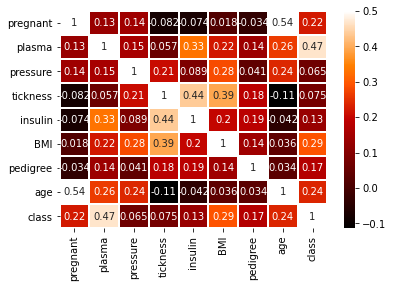

In [10]:
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 0.5, cmap = plt.cm.gist_heat, linecolor = 'white',
           annot = True)
plt.show()
# 히트맵을 통해서 공복혈당과 당뇨병과의 상관관계가 높다는 것을 알 수 있음.

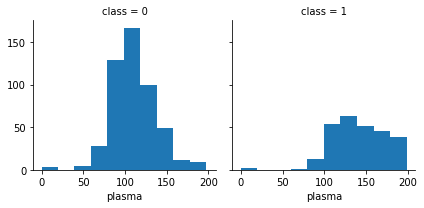

In [11]:
grid = sns.FacetGrid(df, col = 'class')
# grid
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

# 당뇨병에 걸린 사람들은 공복혈당이 150이상인 사람들이 많음을 알 수 있음.

In [12]:
import numpy as np
import tensorflow as tf
np.random.seed(1)
tf.random.set_seed(1)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

dataset = np.loadtxt('./pima-indians-diabetes.csv', delimiter = ',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu')) # 들어가는갯수(열 갯수)
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

model.fit(X, Y, epochs = 10, batch_size = 10)

# print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))
print(model.evaluate(X, Y)[1])

Epoch 1/10
77/77 [==============================] - 0s 978us/step - loss: 12.0693 - accuracy: 0.6273
Epoch 2/10
77/77 [==============================] - 0s 806us/step - loss: 5.7426 - accuracy: 0.6227
Epoch 3/10
77/77 [==============================] - 0s 792us/step - loss: 3.2875 - accuracy: 0.5365
Epoch 4/10
77/77 [==============================] - 0s 798us/step - loss: 1.6549 - accuracy: 0.5589
Epoch 5/10
77/77 [==============================] - 0s 801us/step - loss: 0.8960 - accuracy: 0.4802
Epoch 6/10
77/77 [==============================] - 0s 815us/step - loss: 0.8696 - accuracy: 0.5314
Epoch 7/10
77/77 [==============================] - 0s 814us/step - loss: 0.7652 - accuracy: 0.6588
Epoch 8/10
77/77 [==============================] - 0s 809us/step - loss: 0.7709 - accuracy: 0.6785
Epoch 9/10
77/77 [==============================] - 0s 826us/step - loss: 0.7154 - accuracy: 0.6615
Epoch 10/10
24/24 [==============================] - 0s 740us/step - loss: 0.6373 - accuracy: 0.678